This code shows CNN model with 4 convolutional layer with 2 fully connected layers for 2-dimentional data

In [1]:
# Library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [2]:

def snv(input_data):
  
    # Define a new array and populate it with the corrected data  
    output_data = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
 
        # Apply correction
        output_data[i,:] = (input_data[i,:] - np.mean(input_data[i,:])) / np.std(input_data[i,:])
        #print(output_data)
    return output_data

In [3]:
# load the dataset
data = pd.read_csv('/content/Acetaminophen_mixture_CNN_Binary.csv', index_col=0)
data = pd.DataFrame(data)
data.drop(['label_name'], axis=1, inplace=True)
data.rename(columns={'Unnamed: 0': 'id'},inplace=True)
y = data['label']
X = data.drop(['label'],axis=1)
X = X.values[:,2:]
X = snv(X)
X = pd.DataFrame(X)


(15, 15)


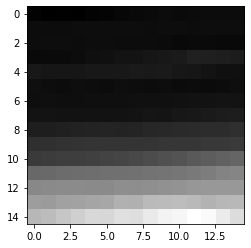

In [4]:
plot = X.values.reshape(900,15,15)
sample_plot =plot[0]
print(sample_plot.shape)
plt.imshow(sample_plot,cmap='gray')
plt.show()

In [5]:
# fit the keras model on the dataset
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

X_train = X_train.values.reshape(X_train.shape[0],15,15,1).astype('float32')
X_test= X_test.values.reshape(X_test.shape[0],15,15,1).astype('float32')
print(X_train.shape)

(720, 15, 15, 1)


In [6]:

# Define Model

tf.keras.metrics.RootMeanSquaredError(
    name="root_mean_squared_error", dtype=None
)
n_timesteps = X_train.shape[1] 
n_features  = X_train.shape[2]  
model = keras.Sequential(name="model_conv2D")
model.add(keras.layers.Input(shape=(n_timesteps,n_features,1)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=7, activation='relu', name="Conv2D_1"))
model.add(keras.layers.Conv2D(filters=32, kernel_size=5, activation='relu', name="Conv2D_2"))
model.add(keras.layers.Conv2D(filters=16, kernel_size=2, activation='relu', name="Conv2D_3"))
model.add(keras.layers.Conv1D(filters=8, kernel_size=2, activation='relu', name="Conv1D_4"))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu', name="Dense_1"))
#model.add(keras.layers.Dense(16, activation='relu',name="Dense_1"))
model.add(keras.layers.Dense(n_features, name="Dense_2"))


model.compile(loss ='mse', optimizer='adam',metrics=['mse','mae',tf.keras.metrics.RootMeanSquaredError()])

In [7]:
model.summary()

Model: "model_conv2D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_1 (Conv2D)           (None, 9, 9, 64)          3200      
                                                                 
 Conv2D_2 (Conv2D)           (None, 5, 5, 32)          51232     
                                                                 
 Conv2D_3 (Conv2D)           (None, 4, 4, 16)          2064      
                                                                 
 Conv1D_4 (Conv1D)           (None, 4, 3, 8)           264       
                                                                 
 flatten (Flatten)           (None, 96)                0         
                                                                 
 Dense_1 (Dense)             (None, 32)                3104      
                                                                 
 Dense_2 (Dense)             (None, 15)               

In [8]:
history = model.fit(X_train, y_train, epochs=20,verbose=1)

Epoch 1/20
23/23 [==============================] - 3s 38ms/step - loss: 0.2541 - mse: 0.2541 - mae: 0.4074 - root_mean_squared_error: 0.5040
Epoch 2/20
23/23 [==============================] - 1s 34ms/step - loss: 0.0907 - mse: 0.0907 - mae: 0.2577 - root_mean_squared_error: 0.3012
Epoch 3/20
23/23 [==============================] - 1s 35ms/step - loss: 0.0284 - mse: 0.0284 - mae: 0.1374 - root_mean_squared_error: 0.1685
Epoch 4/20
23/23 [==============================] - 1s 36ms/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0859 - root_mean_squared_error: 0.1121
Epoch 5/20
23/23 [==============================] - 1s 33ms/step - loss: 0.0086 - mse: 0.0086 - mae: 0.0710 - root_mean_squared_error: 0.0929
Epoch 6/20
23/23 [==============================] - 1s 41ms/step - loss: 0.0068 - mse: 0.0068 - mae: 0.0619 - root_mean_squared_error: 0.0827
Epoch 7/20
23/23 [==============================] - 1s 34ms/step - loss: 0.0071 - mse: 0.0071 - mae: 0.0644 - root_mean_squared_error: 0.0843
Epoch 

In [9]:
myst = pd.read_csv('/content/Mystery_testing_data.csv', index_col=0)
myst = pd.DataFrame(myst)
predictions =[]
myst_predictions = pd.DataFrame(myst["label_name"])
myst.drop(['label_name'], axis=1, inplace=True)

myst_actual = pd.read_csv('/content/Mystery_labels.csv')
myst_actual = myst_actual['Actual ']
# Applying SNV to myst data
myst = myst.values[:,2:]
myst = snv(myst)
myst = pd.DataFrame(myst)
myst= myst.values.reshape(myst.shape[0],15,15,1).astype('float32')
preds = model.predict(myst)
#print(preds)

se = pd.Series(preds.tolist())
for i in range(0, 100):
  
  predictions.append((sum(se[i])/len(se[i])))

myst_predictions.insert(loc=1, column='predictions', value=predictions)
myst_predictions.to_csv('/content/Mystery_Prediction_2DCNN.csv')

# Evaluate model
mse = model.evaluate(myst, myst_actual)
print('Mean Squared Error!',mse)

4/4 [==============================] - 0s 8ms/step - loss: 0.1043 - mse: 0.1043 - mae: 0.1796 - root_mean_squared_error: 0.3229
Mean Squared Error! [0.1042843908071518, 0.1042843908071518, 0.17963306605815887, 0.3229309320449829]


In [10]:
#Predicting Ternary Samples Data
data = pd.read_csv('/content/ternary_samples.csv', index_col=0)
data = pd.DataFrame(data)
ternary_predictions = pd.DataFrame()

ternary_predictions["label_name"] =data["label_name"]
ternary_predictions['Actual'] = data['label']

data.drop(['label_name'], axis=1, inplace=True)
data.rename(columns={'Unnamed: 0': 'id'},inplace=True)

y = data['label']
X = data.drop(['label'],axis=1)
X = X.values[:,2:]
X = snv(X)
X = pd.DataFrame(X)

ternary= X.values.reshape(X.shape[0],15,15,1).astype('float32')
preds = model.predict(ternary)
#print(preds)
se = pd.Series(preds.tolist())
ternary_predictions.insert(loc=0, column='predictions', value=se.values)
#Saving results
ternary_predictions.to_csv('/content/Ternary_Prediction_2DCNN.csv')
# Evaluate model
mse = model.evaluate(ternary, y)
print('Mean Squared Error!',mse)

13/13 [==============================] - 0s 6ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0523 - root_mean_squared_error: 0.0641
Mean Squared Error! [0.004104629624634981, 0.004104629624634981, 0.05227872356772423, 0.06406738609075546]


In [11]:
#Predicting Tylenol Data
data = pd.read_csv('tylenol_topcare_samples.csv', index_col=0)
data = pd.DataFrame(data)
ternary_predictions = pd.DataFrame()

ternary_predictions["label_name"] =data["label_name"]


data.drop(['label_name'], axis=1, inplace=True)
data.rename(columns={'Unnamed: 0': 'id'},inplace=True)

X = data.values[:,2:]
X = snv(X)
X = pd.DataFrame(X)

ternary= X.values.reshape(X.shape[0],15,15,1).astype('float32')
preds = model.predict(ternary)
#print (preds)

se = pd.Series(preds.tolist())
ternary_predictions.insert(loc=0, column='predictions', value=se.values)
#Saving results
ternary_predictions.to_csv('/content/Tylenol_Prediction_2DCNN.csv')